# Sprint 1 - Cleaning and EDA
**Author:** Rachel Chong

**Date:** January 13, 2024

### Introductions
In this project, I aim to leverage data science and machine learning to enhance road safety by analyzing a comprehensive dataset of car accidents across the USA. The "US-Accidents" dataset, spanning from February 2016 to March 2023, provides a wealth of information, including accident severity, timestamps, geographical coordinates, weather conditions, and various Points of Interest annotations. Through thorough data cleaning and Exploratory Data Analysis (EDA), I intend to uncover valuable insights into the factors influencing accidents, identify high-risk areas, and ultimately develop predictive models. By delving into the nuances of this dataset, I aim to contribute to the broader goal of mitigating the societal and economic impact of road accidents, fostering safer and more efficient transportation systems.

### Part 1: Data Cleaning

In [1]:
# Importing data science packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This reads a CSV file into a Pandas dataframe from a local filesystem

df = pd.read_csv('/Users/rachelchong/Desktop/BrainStation/Capstone/US_Accidents_March23.csv')

In [3]:
# Checking shape of the dataframe

df.shape 

(7728394, 46)

In [4]:
# Checking top 5 rows of the dataframe

df.head() 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# This returns a summary of the dataframe, including the column labels, count of non-null values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
# Checking to see if there is a missing value (NaN or none)
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows.

### Part 2: Exploratory Data Analysis (EDA)

In [8]:
# Display basic summary statistics of the numeric columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
# Count the occurrences of  category in a categorical column
df['Weather_Condition'].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

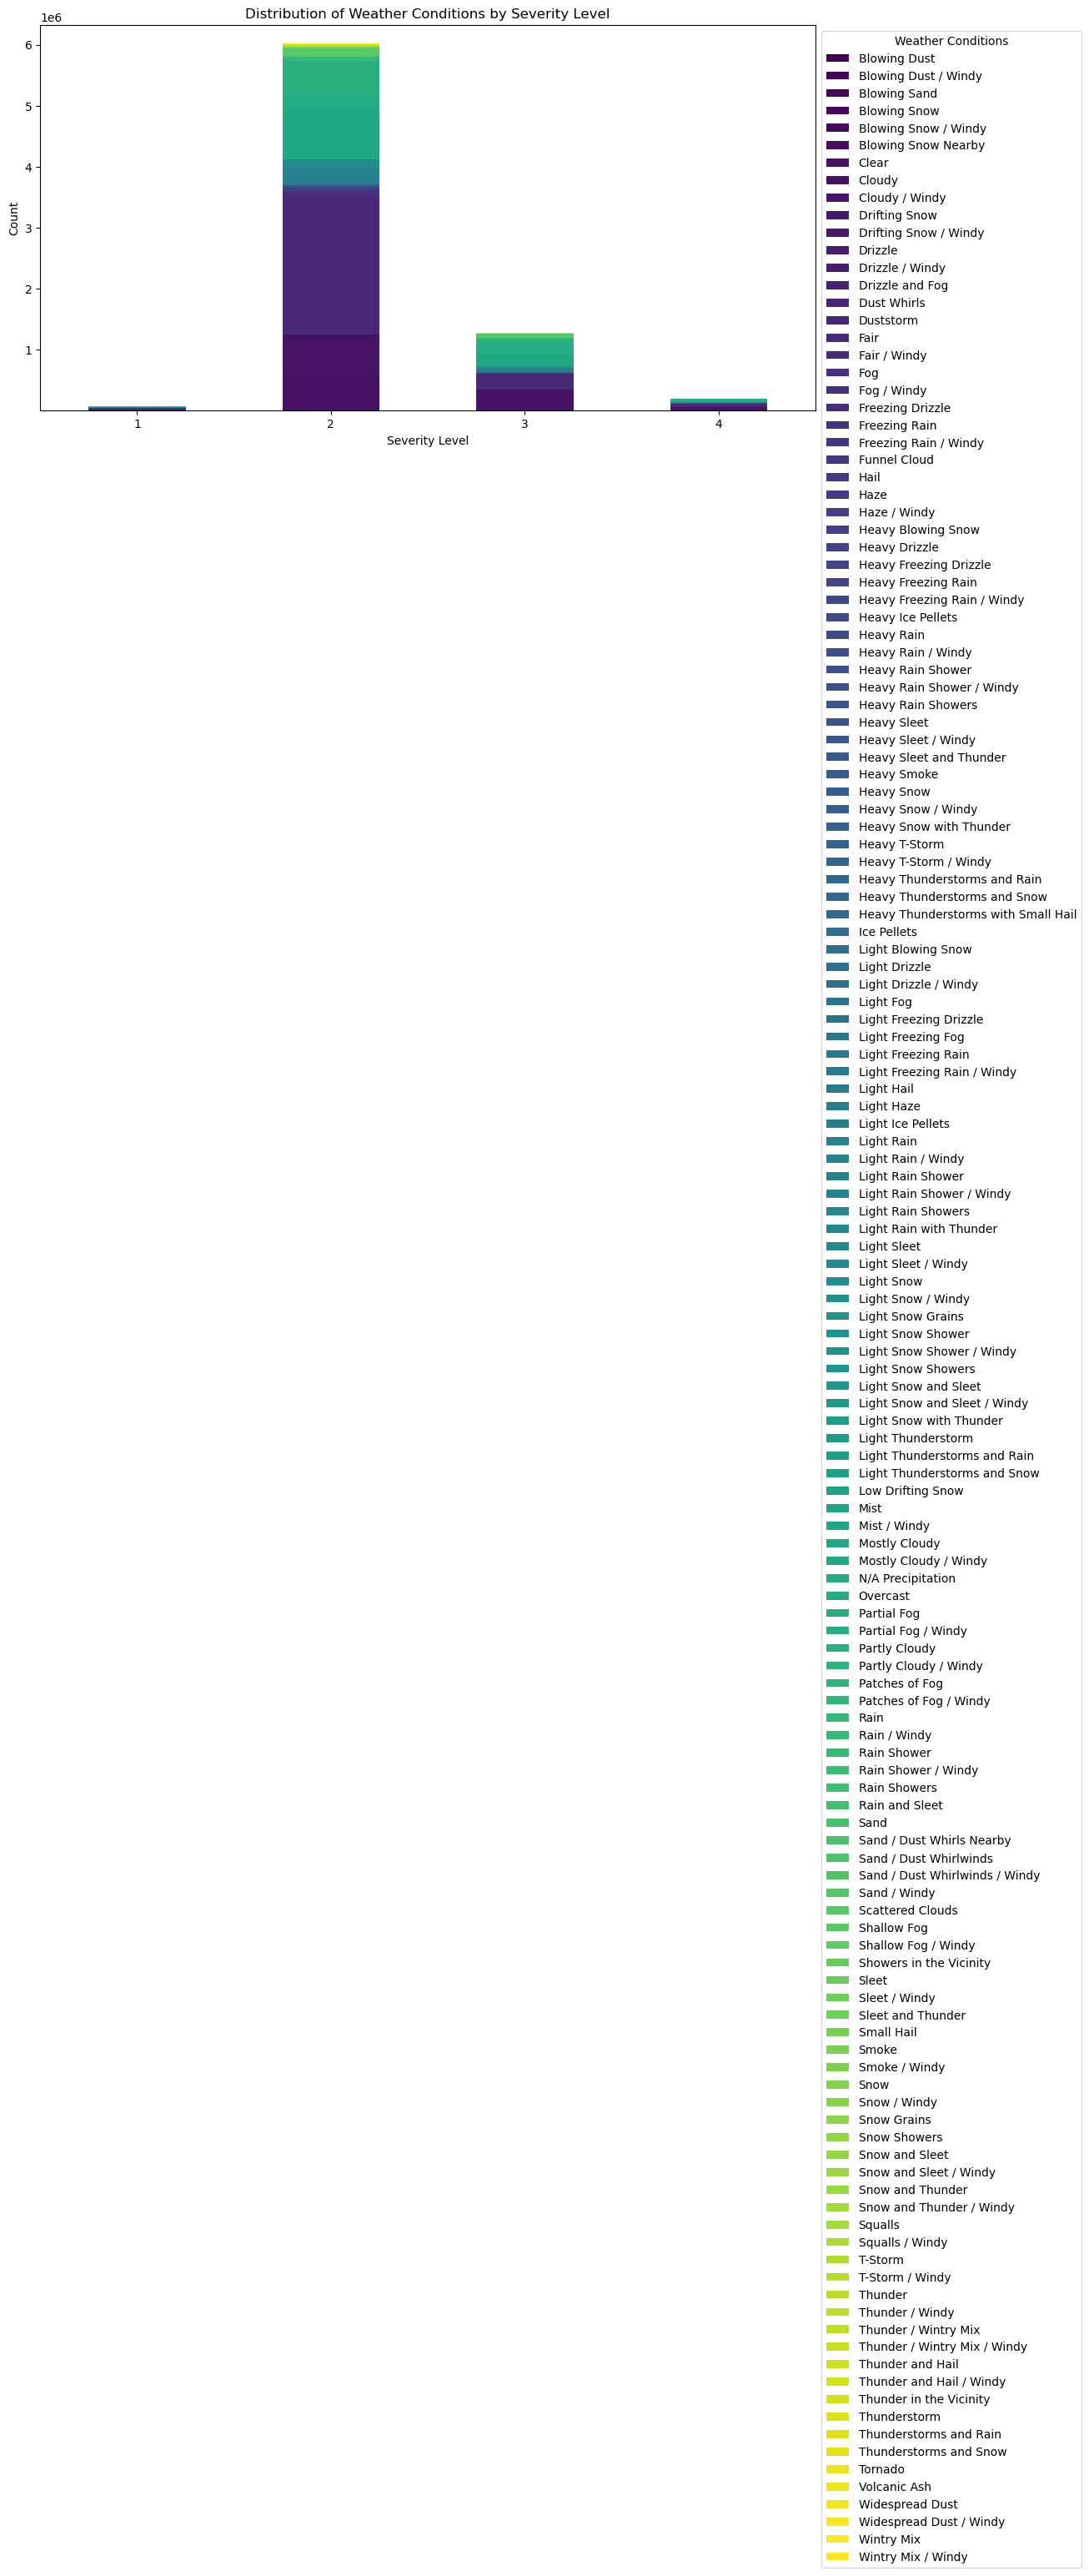

In [10]:
# Group by 'Severity' and 'Weather_Condition', then count occurrences
severity_weather_counts = df.groupby(['Severity', 'Weather_Condition']).size().unstack(fill_value=0)

# Plot the bar chart
severity_weather_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('Distribution of Weather Conditions by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Weather Conditions', bbox_to_anchor=(1, 1), loc='upper left')  # Add legend

# Display the plot
plt.show()

In [11]:
# Count the occurrences of  category in a categorical column
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

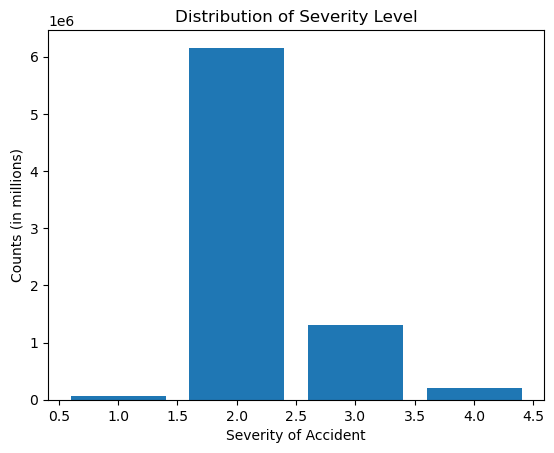

In [12]:
# This creates a bar chart using Matplotlib. 
# It uses df['Severity'].value_counts() to count occurrences of severity and plots these counts as bars. 

plt.bar(df['Severity'].value_counts().index,df['Severity'].value_counts())
plt.xlabel('Severity of Accident') # x-axis 
plt.ylabel('Counts (in millions)') # y-axis 
plt.title('Distribution of Severity Level') #Title of chart
plt.show() #This displays the plot.

In [13]:
# Count the occurrences of each category in a categorical column
df['State'].value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

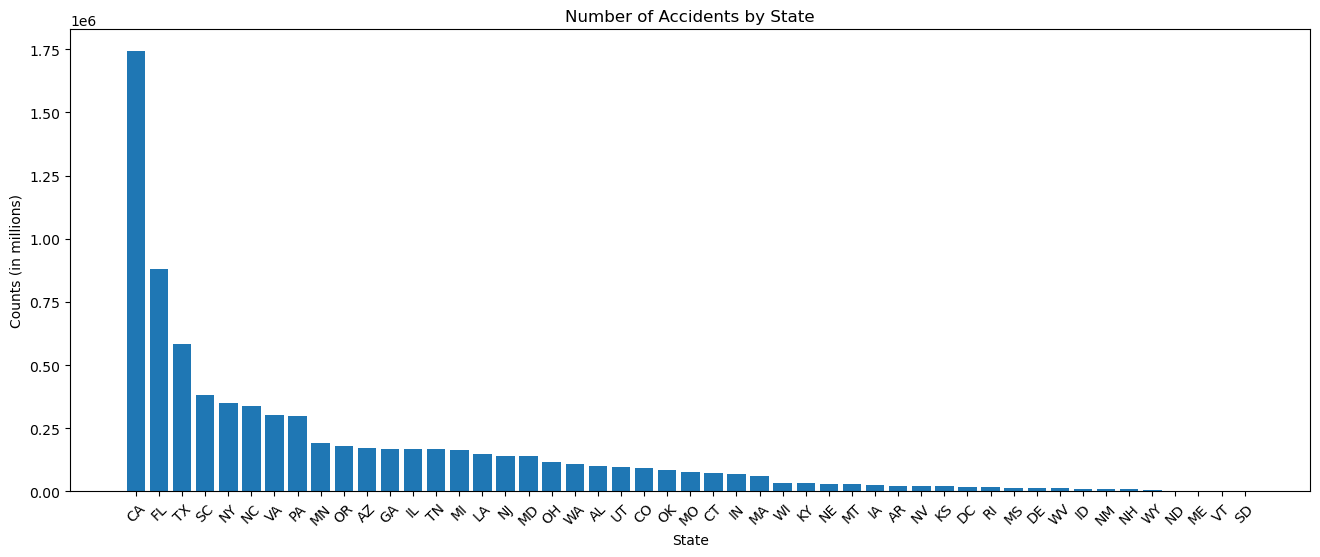

In [14]:
# This creates a bar chart using Matplotlib. 
# It uses df['State'].value_counts() to count occurrences of each year in the 'State' column and plots these counts as bars. 

# Set up the figure and axes with a larger width
plt.figure(figsize=(16, 6))

plt.bar(df['State'].value_counts().index,df['State'].value_counts()) 
plt.xlabel('State') # x-axis represents different states
plt.ylabel('Counts (in millions)') # y-axis shows their respective counts
plt.title('Number of Accidents by State') #Title of chart
plt.xticks(rotation=45)
plt.show() #This displays the plot.

The top 5 states with the most accidents are CA, FL, TX, SC, and NY.

### Data Dictionary

The "US-Accidents" dataset covers accidents across the USA in detail. It includes accident IDs, severity levels, timestamps, GPS coordinates, road length affected, weather data (temperature, humidity, precipitation), and descriptions. Additionally, it notes nearby Points of Interest (POIs) like crossings, traffic signals, and weather conditions categorized by twilight phases and day/night periods. This detailed information allows for a multidimensional analysis to understand accident contexts, aiding predictive modeling and road safety initiatives.

The following table describes the data attributes:

| Attribute             | Description                                                                                           | Nullable |
|-----------------------|-------------------------------------------------------------------------------------------------------|----------|
| ID                    | Unique identifier of the accident record                                                               | No       |
| Severity              | Severity of the accident on a scale of 1 to 4 where 1 indicates minimal impact and 4 significant     | No       |
| Start_Time            | Start time of the accident in local time zone                                                          | No       |
| End_Time              | End time of the accident in local time zone; dismissal of impact on traffic flow                       | No       |
| Start_Lat             | Latitude in GPS coordinate of the start point                                                          | No       |
| Start_Lng             | Longitude in GPS coordinate of the start point                                                         | No       |
| End_Lat               | Latitude in GPS coordinate of the end point (Nullable)                                                 | Yes      |
| End_Lng               | Longitude in GPS coordinate of the end point (Nullable)                                                | Yes      |
| Distance(mi)          | Length of the road extent affected by the accident                                                     | No       |
| Description           | Natural language description of the accident                                                           | No       |
| Number                | Street number in address field (Nullable)                                                              | Yes      |
| Street                | Street name in address field (Nullable)                                                                | Yes      |
| Side                  | Relative side of the street (Right/Left) in address field (Nullable)                                   | Yes      |
| City                  | City in address field (Nullable)                                                                       | Yes      |
| County                | County in address field (Nullable)                                                                     | Yes      |
| State                 | State in address field (Nullable)                                                                      | Yes      |
| Zipcode               | Zipcode in address field (Nullable)                                                                    | Yes      |
| Country               | Country in address field (Nullable)                                                                    | Yes      |
| Timezone              | Timezone based on the location of the accident (Nullable)                                              | Yes      |
| Airport_Code          | Denotes the closest airport-based weather station to the accident location                             | Yes      |
| Weather_Timestamp     | Time-stamp of weather observation record (in local time)                                                | Yes      |
| Temperature(F)        | Temperature in Fahrenheit                                                                             | Yes      |
| Wind_Chill(F)         | Wind chill in Fahrenheit                                                                              | Yes      |
| Humidity(%)           | Humidity percentage                                                                                    | Yes      |
| Pressure(in)          | Air pressure in inches                                                                                 | Yes      |
| Visibility(mi)        | Visibility in miles                                                                                    | Yes      |
| Wind_Direction        | Wind direction                                                                                         | Yes      |
| Wind_Speed(mph)       | Wind speed in miles per hour                                                                           | Yes      |
| Precipitation(in)     | Precipitation amount in inches, if any                                                                 | Yes      |
| Weather_Condition     | Weather condition (rain, snow, thunderstorm, fog, etc.)                                                 | Yes      |
| Amenity               | Presence of amenity in a nearby location                                                               | No       |
| Bump                  | Presence of speed bump or hump in a nearby location                                                    | No       |
| Crossing              | Presence of crossing in a nearby location                                                              | No       |
| Give_Way              | Presence of give_way in a nearby location                                                              | No       |
| Junction              | Presence of junction in a nearby location                                                              | No       |
| No_Exit               | Presence of no_exit in a nearby location                                                               | No       |
| Railway               | Presence of railway in a nearby location                                                               | No       |
| Roundabout            | Presence of roundabout in a nearby location                                                            | No       |
| Station               | Presence of station in a nearby location                                                               | No       |
| Stop                  | Presence of stop in a nearby location                                                                  | No       |
| Traffic_Calming       | Presence of traffic_calming in a nearby location                                                       | No       |
| Traffic_Signal        | Presence of traffic_signal in a nearby location                                                        | No       |
| Turning_Loop          | Presence of turning_loop in a nearby location                                                          | No       |
| Sunrise_Sunset        | Period of day (day or night) based on sunrise/sunset                                                   | Yes      |
| Civil_Twilight        | Period of day (day or night) based on civil twilight                                                   | Yes      |
| Nautical_Twilight     | Period of day (day or night) based on nautical twilight                                                | Yes      |
| Astronomical_Twilight | Period of day (day or night) based on astronomical twilight                                            | Yes      |
